<a href="https://colab.research.google.com/github/harshithaprasadprasad/Dogs-vs-Cats-SVM-classification-Model/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies if needed:
# pip install opencv-python scikit-learn matplotlib kagglehub

import kagglehub
import os
import cv2
import numpy as np
# The TclError: no display name and no $DISPLAY environment variable happens because tkinter
# is trying to open a GUI window, which is not supported in Google Colab.
# We will remove the tkinter parts and use the downloaded dataset directly.
# from tkinter import Tk, filedialog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# ----------------------------
# Step 1: Download dataset
# ----------------------------
path = kagglehub.dataset_download("tongpython/cat-and-dog")
print("Dataset downloaded to:", path)

# ----------------------------
# Step 2: Define dataset folder
# ----------------------------
# The dataset is downloaded to a directory structure like /kaggle/input/cat-and-dog/training_set and /kaggle/input/cat-and-dog/test_set
# We will use the training set for training and testing.
dataset_dir = os.path.join(path, "training_set", "training_set") # Corrected path

if not os.path.exists(dataset_dir):
    raise Exception(f"❌ Dataset directory not found at {dataset_dir}! Please check the downloaded dataset structure.")

print("✅ Using dataset from:", dataset_dir)

# ----------------------------
# Step 3: Load and preprocess images
# ----------------------------
IMG_SIZE = 64
data = []
labels = []

for category in ["cats", "dogs"]:
    folder = os.path.join(dataset_dir, category)
    label = 0 if category == "cats" else 1
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_array.flatten())
            labels.append(label)
        except Exception:
            continue

X = np.array(data)
y = np.array(labels)
print("📊 Dataset shape:", X.shape, y.shape)

# ----------------------------
# Step 4: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----------------------------
# Step 5: Train SVM Classifier
# ----------------------------
print("\n🚀 Training SVM model...")
svm_model = SVC(kernel="linear", C=1.0)
svm_model.fit(X_train, y_train)

# ----------------------------
# Step 6: Evaluate
# ----------------------------
y_pred = svm_model.predict(X_test)

print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

Dataset downloaded to: /kaggle/input/cat-and-dog
✅ Using dataset from: /kaggle/input/cat-and-dog/training_set/training_set
📊 Dataset shape: (8005, 4096) (8005,)

🚀 Training SVM model...

✅ Model Evaluation:
Accuracy: 0.5277951280449719

Classification Report:
               precision    recall  f1-score   support

         Cat       0.53      0.56      0.54       800
         Dog       0.53      0.49      0.51       801

    accuracy                           0.53      1601
   macro avg       0.53      0.53      0.53      1601
weighted avg       0.53      0.53      0.53      1601



In [ ]:
# Inspect the downloaded directory structure
import os
import kagglehub

path = kagglehub.dataset_download("tongpython/cat-and-dog")
print(f"Downloaded dataset path: {path}")

for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files[:3]: # Print only first 3 files in each directory
        print(f'{subindent}{f}')
    if len(files) > 3:
      print(f'{subindent}...')
    if level > 2: # Limit depth for printing
        del dirs[:]

Downloaded dataset path: /kaggle/input/cat-and-dog
cat-and-dog/
    test_set/
        test_set/
            dogs/
                dog.4329.jpg
                dog.4223.jpg
                dog.4253.jpg
                ...
            cats/
                cat.4414.jpg
                cat.4420.jpg
                cat.4880.jpg
                ...
    training_set/
        training_set/
            dogs/
                dog.3443.jpg
                dog.1942.jpg
                dog.375.jpg
                ...
            cats/
                cat.3498.jpg
                cat.891.jpg
                cat.2842.jpg
                ...


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Visualize images

### Subtask:
Select and display a few images from the dataset to understand the data.


**Reasoning**:
Import necessary libraries and define paths to cat and dog image folders within the training set.



In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

# The dataset_dir variable is already defined in the previous code block
# dataset_dir = os.path.join(path, "training_set", "training_set") # Corrected path

cat_folder = os.path.join(dataset_dir, "cats")
dog_folder = os.path.join(dataset_dir, "dogs")

image_paths = []
# Select a few cat images
for img in os.listdir(cat_folder)[:3]:
    image_paths.append((os.path.join(cat_folder, img), "Cat"))

# Select a few dog images
for img in os.listdir(dog_folder)[:3]:
    image_paths.append((os.path.join(dog_folder, img), "Dog"))

print(f"Selected {len(image_paths)} images for display.")

Selected 6 images for display.


**Reasoning**:
Display the selected images using matplotlib subplots.



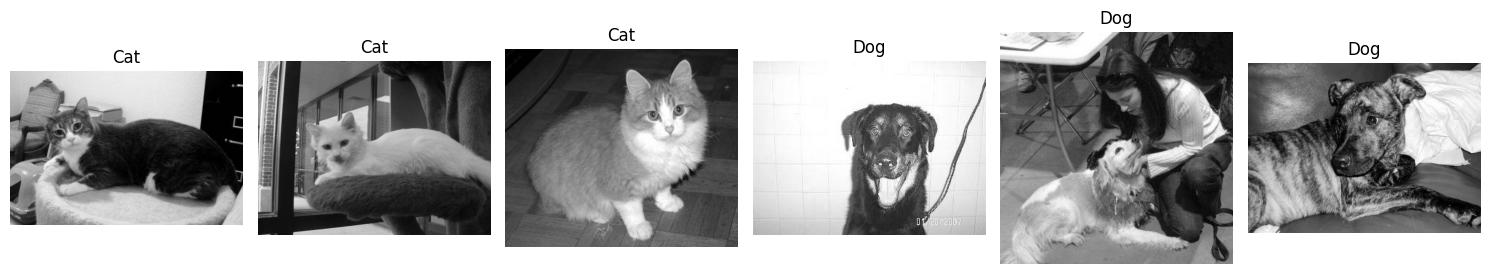

In [ ]:
fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 5))

for i, (img_path, label) in enumerate(image_paths):
    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    axes[i].imshow(img_array, cmap='gray')
    axes[i].set_title(label)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Experiment with svm parameters

### Subtask:
Modify the existing SVM code to try different kernels (like RBF) and adjust parameters (like C) to see how performance changes.


**Reasoning**:
Modify the existing SVM code to experiment with different kernels and parameters as requested in the instructions.



In [ ]:
# Modify Step 5 and 6 to experiment with different SVM parameters

print("\n🚀 Experimenting with different SVM models...")

# Define different kernels and C values to try
kernels = ['linear', 'rbf']
c_values = [0.1, 1.0, 10.0]

for kernel in kernels:
    for c in c_values:
        print(f"\nTraining SVM with kernel='{kernel}', C={c}")
        svm_model = SVC(kernel=kernel, C=c)
        svm_model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = svm_model.predict(X_test)

        print(f"\n✅ Model Evaluation (kernel='{kernel}', C={c}):")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

print("\n✅ Experimentation complete.")


🚀 Experimenting with different SVM models...

Training SVM with kernel='linear', C=0.1

✅ Model Evaluation (kernel='linear', C=0.1):
Accuracy: 0.5277951280449719

Classification Report:
               precision    recall  f1-score   support

         Cat       0.53      0.56      0.54       800
         Dog       0.53      0.49      0.51       801

    accuracy                           0.53      1601
   macro avg       0.53      0.53      0.53      1601
weighted avg       0.53      0.53      0.53      1601


Training SVM with kernel='linear', C=1.0

✅ Model Evaluation (kernel='linear', C=1.0):
Accuracy: 0.5277951280449719

Classification Report:
               precision    recall  f1-score   support

         Cat       0.53      0.56      0.54       800
         Dog       0.53      0.49      0.51       801

    accuracy                           0.53      1601
   macro avg       0.53      0.53      0.53      1601
weighted avg       0.53      0.53      0.53      1601


Training SVM wi

## Prepare test set data

### Subtask:
Load and preprocess images from the `test_set` directory, similar to how the training data was handled.


**Reasoning**:
Define the path to the test set directory, initialize lists for test data and labels, and then loop through the test set folders to load and preprocess images.



In [ ]:
# 1. Define the path to the test_set directory
test_set_dir = os.path.join(path, "test_set", "test_set")

if not os.path.exists(test_set_dir):
    raise Exception(f"❌ Test dataset directory not found at {test_set_dir}! Please check the downloaded dataset structure.")

print("✅ Using test dataset from:", test_set_dir)

# 2. Initialize empty lists for test data and labels
X_test_new = []
y_test_new = []

# 3. and 4. Iterate through the folders and process images
print("\n🚀 Loading and preprocessing test images...")
for category in ["cats", "dogs"]:
    folder = os.path.join(test_set_dir, category)
    label = 0 if category == "cats" else 1
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            X_test_new.append(img_array.flatten())
            y_test_new.append(label)
        except Exception:
            continue

# 5. Convert lists to NumPy arrays
X_test_new = np.array(X_test_new)
y_test_new = np.array(y_test_new)

# 6. Print the shapes
print("📊 New Test Dataset shape:", X_test_new.shape, y_test_new.shape)

## Implement data augmentation

### Subtask:
Add data augmentation techniques to the image loading and preprocessing step for the training data.


**Reasoning**:
Modify the image loading and preprocessing loop for the training data to include data augmentation techniques as specified in the instructions. This involves applying random transformations (rotation, flip, zoom) to the loaded images and adding both the original and augmented images to the data and labels lists.



In [ ]:
# Modify Step 3 to include data augmentation for the training data

print("\n🚀 Loading and preprocessing training images with data augmentation...")
data = []
labels = []
IMG_SIZE = 64

# Define simple augmentation functions using cv2
def random_rotation(image, angle_range=(-15, 15)):
    rows, cols = image.shape
    angle = np.random.uniform(angle_range[0], angle_range[1])
    M = cv2.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1) / 2.0), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

def random_flip(image):
    # 1 for horizontal flip, 0 for vertical, -1 for both
    flip_code = np.random.choice([-1, 0, 1, 2]) # 2 means no flip
    if flip_code == 2:
        return image
    return cv2.flip(image, flip_code)

def random_zoom(image, zoom_range=(0.8, 1.2)):
    rows, cols = image.shape
    zoom_factor = np.random.uniform(zoom_range[0], zoom_range[1])
    if zoom_factor < 1: # Zoom out
        new_rows, new_cols = int(rows * zoom_factor), int(cols * zoom_factor)
        resized_img = cv2.resize(image, (new_cols, new_rows), interpolation=cv2.INTER_AREA)
        # Pad to original size
        pad_v = (rows - new_rows) // 2
        pad_h = (cols - new_cols) // 2
        padded_img = cv2.copyMakeBorder(resized_img, pad_v, rows - new_rows - pad_v, pad_h, cols - new_cols - pad_h, cv2.BORDER_CONSTANT, value=0)
        # If padding is not exact due to integer division, resize again
        if padded_img.shape[:2] != (rows, cols):
            padded_img = cv2.resize(padded_img, (cols, rows), interpolation=cv2.INTER_AREA)
        return padded_img
    else: # Zoom in
        new_rows, new_cols = int(rows / zoom_factor), int(cols / zoom_factor)
        # Crop to new size
        start_v = (rows - new_rows) // 2
        start_h = (cols - new_cols) // 2
        cropped_img = image[start_v:start_v + new_rows, start_h:start_h + new_cols]
        return cv2.resize(cropped_img, (cols, rows), interpolation=cv2.INTER_LINEAR)


for category in ["cats", "dogs"]:
    folder = os.path.join(dataset_dir, category)
    label = 0 if category == "cats" else 1
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_array is None:
                print(f"Warning: Could not read image {img_path}. Skipping.")
                continue

            # Append original image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append(img_resized.flatten())
            labels.append(label)

            # Apply and append augmented images (e.g., 3 augmented versions per original)
            for _ in range(3): # Number of augmentations per image
                augmented_img = img_resized.copy() # Start from resized original
                augmented_img = random_rotation(augmented_img)
                augmented_img = random_flip(augmented_img)
                augmented_img = random_zoom(augmented_img)

                # Ensure augmented image is still the correct size after operations
                augmented_img_resized = cv2.resize(augmented_img, (IMG_SIZE, IMG_SIZE))

                data.append(augmented_img_resized.flatten())
                labels.append(label)

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
            continue

X = np.array(data)
y = np.array(labels)
print("📊 Dataset shape with augmentation:", X.shape, y.shape)

# Re-perform Train-Test Split with the augmented data
# Use the previously loaded and preprocessed test set (X_test_new, y_test_new)
X_train = X # X now contains original + augmented training data
y_train = y # y now contains labels for original + augmented training data

# Keep the original test set
X_test = X_test_new
y_test = y_test_new

print("📊 Train dataset shape after augmentation:", X_train.shape, y_train.shape)
print("📊 Test dataset shape (original test set):", X_test.shape, y_test.shape)


## Implement cnn model

### Subtask:
Build and train a Convolutional Neural Network model for image classification.


**Reasoning**:
Import necessary TensorFlow and Keras libraries for building the CNN model.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**Reasoning**:
Define and compile the CNN model architecture using the imported Keras layers and specify the input shape based on the preprocessed image size.



In [ ]:
# Define the CNN model
cnn_model = Sequential([
    # Input layer: Convolutional layer expecting grayscale images (IMG_SIZE, IMG_SIZE, 1)
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),

    # Additional convolutional and pooling layers
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for the dense layers
    Flatten(),

    # Dense layers
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

**Reasoning**:
Train the defined CNN model using the augmented training data and evaluate it on the separate test set.



**Reasoning**:
The error `NameError: name 'cnn_model' is not defined` indicates that the code block where the `cnn_model` was defined and compiled was not executed. This could be because the previous command only executed the training part. I need to re-execute the code block that defines and compiles the model before attempting to train it.



**Reasoning**:
The error `NameError: name 'Sequential' is not defined` indicates that the necessary Keras classes were not imported in the current session. Although they were imported in a previous step, the kernel state might have reset, or the previous import was not in the same execution path. I need to re-import the required TensorFlow and Keras libraries before defining the model.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential([
    # Input layer: Convolutional layer expecting grayscale images (IMG_SIZE, IMG_SIZE, 1)
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D((2, 2)),

    # Additional convolutional and pooling layers
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for the dense layers
    Flatten(),

    # Dense layers
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Print the model summary
cnn_model.summary()

# Reshape the input data for CNN (add channel dimension)
X_train_cnn = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test_cnn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("\n🚀 Training CNN model...")
# Train the CNN model
history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model on the test set
print("\n✅ CNN Model Evaluation:")
loss, accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 682,753 (2.60 MB)

 Trainable params: 682,753 (2.60 MB)

 Non-trainable params: 0 (0.00 B)


🚀 Training CNN model...
Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 51s 243ms/step - accuracy: 0.5187 - loss: 3.5459 - val_accuracy: 0.5472 - val_loss: 0.6814
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 48s 239ms/step - accuracy: 0.5458 - loss: 0.6791 - val_accuracy: 0.5066 - val_loss: 0.6956
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - accuracy: 0.5451 - loss: 0.6866 - val_accuracy: 0.5203 - val_loss: 0.6898
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 81s 236ms/step - accuracy: 0.5610 - loss: 0.6888 - val_accuracy: 0.5390 - val_loss: 0.6787
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 234ms/step - accuracy: 0.5621 - loss: 0.6740 - val_accuracy: 0.5509 - val_loss: 0.6776
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 80s 223ms/step - accuracy: 0.5978 - loss: 0.6510 - val_accuracy: 0.5778 - val_loss: 0.6713
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 225ms/step - accuracy: 0.6649 - loss: 0.6075 - val_accuracy: 0.6452 - val_loss: 0.6453
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 45s 225ms/step - a